In [35]:
import pandas as pd
import numpy as np
import random as rd

from sklearn.decomposition import PCA
from sklearn import preprocessing

import matplotlib.pyplot as plt
#import seaborn as sb

In [36]:
# Create a sample dataset:
genes = ['gene' + str(i) for i in range(1, 101)]

In [37]:
# Knockout and wildtype samples:
wt = ['wt' + str(i) for i in range(1, 6)]
ko = ['ko' + str(i) for i in range(1, 6)]

In [38]:
# Added the * to unpack the values of both lists.
data = pd.DataFrame(columns=[*wt, *ko], index=genes)

In [39]:
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)

Note that this dataframe is the transpose of what we ususally work with on pandas. Here each row represents a dimension/variable and each column represents an observation.

In [40]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,1010,1018,1010,979,999,93,97,84,87,90
gene2,671,652,675,656,582,494,517,492,527,491
gene3,131,115,105,119,99,379,351,415,367,373
gene4,540,530,538,531,541,329,292,333,307,306
gene5,996,1012,981,1033,1008,899,858,805,814,785


In [41]:
# Center and scale data to have average value of 0
# and a standard deviation of 1.

scaled_data = preprocessing.scale(data.T) 
# ^ a transpose is necessary due to our DataFrame.

/home/gml/anaconda3/envs/DiabManager/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


## Note on scaling:
Sklearn calculates the transformation using:
$ \tilde{x} = \frac{(x - \bar{x})^2}{ n }$

While R uses:
$ \tilde{x} = \frac{(x - \bar{x})^2 }{ n - 1 }$

R's method results in larger, but unbiased estimates of the variation.

In [42]:
# Alternatively:
# scaled_data = StandardScaler().fit_transform(data.T)

In [43]:
pca = PCA()

In [44]:
# Calculate the loading scores and variation for each PC.
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [45]:
pca_data = pca.transform(scaled_data)

In [46]:
# Calculate percent of variation for each Principal Component
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

In [47]:
# Create labels for the scree plot.
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)] 

Text(0.5, 1.0, 'Scree Plot')

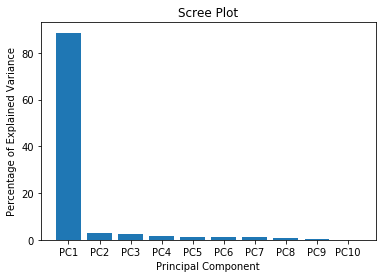

In [48]:
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')

As shown by the previous scree plot, almost all of the variation is along the first PC, so a 2-D graph, using PC1 and PC2 should do a good job representing the original data.

In [49]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

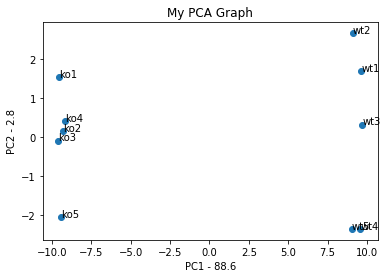

In [50]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel(f'PC1 - {per_var[0]}')
plt.ylabel(f'PC2 - {per_var[1]}')

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

In [51]:
loading_scores = pd.Series(pca.components_[0], index=genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values

In [52]:
# Get the 'contribution score for each gene.'
loading_scores[top_10_genes]

gene31    0.106216
gene35   -0.106195
gene1     0.106195
gene33    0.106155
gene21    0.106144
gene45    0.106141
gene48    0.106124
gene8    -0.106120
gene43   -0.106104
gene26    0.106096
dtype: float64

The values are super similar, so a lot of the genes played a role un separating the samples, rather than just one or two.